<center>
    <h1>Faculty of Information and Communication Technology</h1>
    <h1>Mahidol University</h1>
    <h2>ITCS159 Software Lab for Basic Scientific Problem Solving</h2>
    <h2>Quiz</h2>
</center>

<h4>Direction: This is an Open book examination. Please give the comments for all lines of code to show your understanding. Without the comments, the quiz will not be scored.</h4>

## Print your ID, your name, and section using Python here, e.g., 
## 6088159 Harry Potter Section: 2

In [2]:
# 6388040 Ariya Phengphon Section: 2

<h2>Import all necessary packages in the below cell</h2>

In [3]:
import numpy as np
import scipy
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from skimage import io
from skimage . transform import resize , rotate , swirl

<h2>Q1. Given the information of New York City Airbnb (<a href='https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data'>Ref</a>) as presented in a file named <i>AB_NYC_2019.csv</i>. Please answer the following questions.</h2>

<h3>Q1.1. Show the data (1 point)</h3>

In [4]:
df = pd.read_csv('AB_NYC_2019.csv') # read the dataset, and put name into each column
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<h3>Q1.2. Please use python to check and show whether there is any colum has null value (1 point)</h3>

In [5]:
df.isnull().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

<h3>Q1.3. Show the number of room for each neighbourhood group as shown in the below image (1 point)</h3>
<img src="Q13_output.png" />

In [6]:
print(df.groupby('neighbourhood_group').size()) # group all of the items on the dataset by using 'class' to seperate

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
dtype: int64


<h3>Q1.4. Using <i>Matplotlib</i> library to display the following output (2 points)</h3>
<img src="Q14_output.png" />

Text(0.5, 1.0, 'Comparison between #Review and Price')

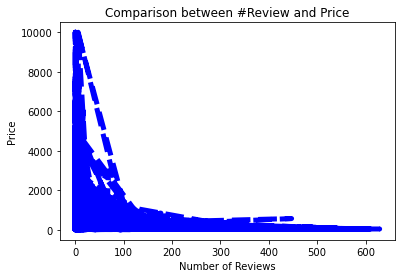

In [7]:
df = pd.read_csv('AB_NYC_2019.csv') # read the dataset, and put name into each column
price = df['price'] # extract data from price
noReview = df['number_of_reviews']
plt.plot(noReview, price, '--', linewidth = 5, color='blue')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Comparison between #Review and Price')

<h3>Q1.5. Apply <i>KMeans</i> clustering technique from <i>sklearn</i> library to compute <i>n</i> clusters of data in dataset <i>df</i> loaded in Q1.1, where <i>n</i> is the last digit of your student id. Only the data from column 'latitude', 'longitude', 'price', and 'number_of_reviews' are considered as inputs (X). Then, create a prediction model to predict the closest cluster for each sample in X belongs to and display the result of prediction where X is used as an input. (3 points)</h3>

In [8]:
tt = pd.read_csv('AB_NYC_2019.csv')
array = tt.values # get values from tt

# use: 6 7 9 11
X = array[:,6:12]
# column starts from 0-n
X = np.delete(X, 2, 1) # delete room_type
X = np.delete(X, 3, 1) # delete minimum_nights

model = KMeans(n_clusters = 4) # seperate into n_cluster groups > group up data, I have no idea what is n = 0, so i use 4 from 40
model.fit(X) # takes the training data as arguments based on the n_clusters we set before

KMeans(n_clusters=4)

<h3>Q1.6. Write a python code to measure cluster quality. (1 point)</h3>

In [9]:
print(model.inertia_) # inertia_: how well a dataset was clustered by K-Means.

596568394.071417


<h2>Q2. Given a two-arrows RGB image. Use your python knowledge to answer the following sub-questions.</h2>
<img src="2arrows.png" />

<h3>Q2.1 What are the <i>shape</i> and <i>size</i> of the image? Please use Python to print them. (2 points)</h3>

In [10]:
img = io.imread('2arrows.png')
print(img.shape) # dimension => shape
print(img.size) # each array [] [] [] => size

(322, 642, 4)
826896


<h3>Q2.2 Write a python code to crop the image and display as the following output? (1 point)</h3>
<img src="Q22_output.png" />

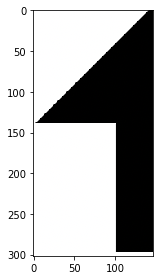

In [11]:
newim = img[20:400, 3:150]
io.imshow(newim)

<h3>Q2.3 Write a python code to rotate the image processed from Q2.2 <i>n</i> degrees, where <i>n</i> is the last three digits of your student id and display the output? (2 points)</h3>

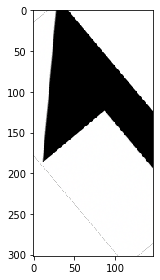

In [12]:
rotate = rotate(newim, 40) # its 040, so put 40
io.imshow(rotate)
io.show()

<h2>Q3. Given the following data about Automobile (imports-85.data) [1] (<a href='https://archive.ics.uci.edu/ml/datasets/Automobile'>Ref</a>). Please answer the following question</h2>

<h3>Data Set Information:</h3>
This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

<h3>Attribute Information:</h3>
Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

<h3>Reference</h3>
<ol>
    <li>Kibler, D., Aha, D.W., & Albert,M. (1989). Instance-based prediction of real-valued attributes. Computational Intelligence, Vol 5, 51--57.</li>
</ol>


<h3>Q3.1 Show the first five rows of the data as shown below. (2 points)</h3>
<img src='Q31_output.png'/>

In [13]:
# df = df.rename(columns={'symboling', 'normailzed-losses', 'make', 'fuel-type', 'aspiration',
#         'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-size',
#         'fuel-system', 'bore', 'stoke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'})
df = pd.read_csv('imports-85.data', names=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'number-of-doors'
                                        'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height',
                                        'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
                                        'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']) # read the dataset, and put name into each column
df.fillna('Nan').head() # ??
# df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doorsbody-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3>Q3.2 Find the correlation of this data and the following questions</h3>

<h4>Q3.2.1 Find the correlation and show the output (2 point)</h4>

<AxesSubplot:>

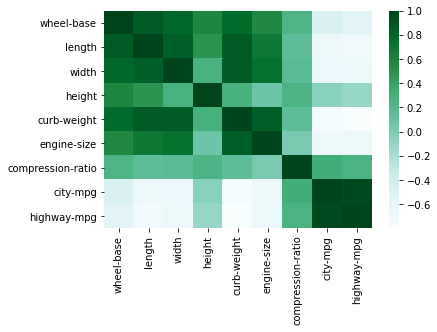

In [14]:
corr = df.corr()    # .corr(): Compute pairwise correlation of columns, excluding NA/null values. (correlation coefficient)
# print("corr",corr)  # relation among two variables, 0 = no relation, 1 = positive relation when one increases another increase follow, -1 = negative relation
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="BuGn")

<h4>Q3.2.2 Which pair of variables has the strongest positive correlation, and what does it mean? (2 points)</h4>

In [15]:
# Answer here
# The strongest relation pos correlation is the one that the darnest green, (corr = 1)